In [1]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### Notebook para limpiar datos y generar Features

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [4]:
print('Cantidad nulos en Titulo:', df_train.titulo.isnull().sum())

Cantidad nulos en Titulo: 5387


In [5]:
df_test.idzona.value_counts().nsmallest(9000)

114240.0    1
50907.0     1
48691.0     1
65694.0     1
79452.0     1
           ..
23886.0     4
262486.0    4
56911.0     4
59899.0     4
41464.0     4
Name: idzona, Length: 9000, dtype: int64

In [6]:
print('Cantidad nulos en Descripcion:', df_train.descripcion.isnull().sum())

Cantidad nulos en Descripcion: 1619


In [7]:
print('Cantidad nulos en Tipo Propiedad:', df_train.tipodepropiedad.isnull().sum())
df_train.tipodepropiedad.value_counts()

Cantidad nulos en Tipo Propiedad: 46


Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [8]:
print('Cantidad nulos en Ciudad:', df_train.ciudad.isnull().sum())
df_train.ciudad.value_counts()

Cantidad nulos en Ciudad: 372


Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
                   ...  
ZirAndaro              1
Chilchota              1
Hopelchén              1
Poanas                 1
Saucillo               1
Name: ciudad, Length: 875, dtype: int64

In [9]:
print('Cantidad nulos en Provincia:', df_train.provincia.isnull().sum())
df_train.provincia.value_counts()

Cantidad nulos en Provincia: 155


Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [10]:
print('Cantidad nulos en Habitaciones:', df_train.habitaciones.isnull().sum())
df_train.habitaciones.value_counts()

Cantidad nulos en Habitaciones: 22471


3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

In [11]:
print('Cantidad nulos en Garages:', df_train.garages.isnull().sum())
df_train.garages.value_counts()

Cantidad nulos en Garages: 37765


2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [12]:
print('Cantidad nulos en Antiguedad:', df_train.antiguedad.isnull().sum())
df_train.antiguedad.value_counts()

Cantidad nulos en Antiguedad: 43555


0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
        ...  
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [13]:
print('Cantidad nulos en Baños:', df_train.banos.isnull().sum())
df_train.banos.value_counts()

Cantidad nulos en Baños: 26221


2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [14]:
print('Cantidad nulos en Metros Cubiertos:', df_train.metroscubiertos.isnull().sum())
df_train.metroscubiertos.value_counts()

Cantidad nulos en Metros Cubiertos: 17400


200.0    4984
120.0    4290
60.0     4217
90.0     4204
300.0    3920
         ... 
18.0       13
22.0       12
19.0       10
21.0        9
17.0        8
Name: metroscubiertos, Length: 425, dtype: int64

In [15]:
print('Cantidad nulos en Metros Totales:', df_train.metrostotales.isnull().sum())
df_train.metrostotales.value_counts()

Cantidad nulos en Metros Totales: 51467


90.0     7042
200.0    6957
160.0    6026
120.0    5687
300.0    4837
         ... 
18.0       14
21.0       14
17.0       13
23.0       10
19.0        8
Name: metrostotales, Length: 425, dtype: int64

In [16]:
print('Cantidad nulos en Gimnasio:', df_train.gimnasio.isnull().sum())
df_train.gimnasio.value_counts()

Cantidad nulos en Gimnasio: 0


0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [17]:
print('Cantidad nulos en SUM:', df_train.usosmultiples.isnull().sum())
df_train.usosmultiples.value_counts()

Cantidad nulos en SUM: 0


0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [18]:
print('Cantidad nulos en Piscina:', df_train.piscina.isnull().sum())
df_train.piscina.value_counts()

Cantidad nulos en Piscina: 0


0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [19]:
print('Cantidad nulos en Escuelas Cercanas:', df_train.escuelascercanas.isnull().sum())
df_train.escuelascercanas.value_counts()

Cantidad nulos en Escuelas Cercanas: 0


0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [20]:
print('Cantidad nulos en Centros Comerciales Cercanos:', df_train.centroscomercialescercanos.isnull().sum())
df_train.centroscomercialescercanos.value_counts()

Cantidad nulos en Centros Comerciales Cercanos: 0


0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [21]:
print('Cantidad nulos en Fecha:', df_train.fecha.isnull().sum())

Cantidad nulos en Fecha: 0


In [22]:
df_test.isnull().sum()

id                                0
titulo                         1378
descripcion                     401
tipodepropiedad                   7
direccion                     13191
ciudad                           83
provincia                        42
antiguedad                    10714
habitaciones                   5628
garages                        9323
banos                          6554
metroscubiertos                4299
metrostotales                 12655
idzona                         7179
lat                           30695
lng                           30695
fecha                             0
gimnasio                          0
usosmultiples                     0
piscina                           0
escuelascercanas                  0
centroscomercialescercanos        0
dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------

### Reemplazo de Nulos

In [23]:
# Imputamos los NaNs
df_train['metroscubiertos'] = imp_mean.fit_transform(df_train[['metroscubiertos']])
df_test['metroscubiertos'] = imp_mean.transform(df_test[['metroscubiertos']])

In [24]:
# Imputamos los NaNs
df_train['metrostotales'] = imp_mean.fit_transform(df_train[['metrostotales']])
df_test['metrostotales'] = imp_mean.transform(df_test[['metrostotales']])

In [25]:
# Imputamos los NaNs
df_train['banos'] = imp_mean.fit_transform(df_train[['banos']])
df_test['banos'] = imp_mean.transform(df_test[['banos']])

In [26]:
# Imputamos los NaNs
df_train['antiguedad'] = imp_mean.fit_transform(df_train[['antiguedad']])
df_test['antiguedad'] = imp_mean.transform(df_test[['antiguedad']])

In [27]:
# Imputamos los NaNs
df_train['garages'] = imp_mean.fit_transform(df_train[['garages']])
df_test['garages'] = imp_mean.transform(df_test[['garages']])

In [28]:
# Imputamos los NaNs
df_train['habitaciones'] = imp_mean.fit_transform(df_train[['habitaciones']])
df_test['habitaciones'] = imp_mean.transform(df_test[['habitaciones']])

In [29]:
# Imputamos los Nulos
df_train['tipodepropiedad'].fillna("Sin datos", inplace = True)
df_test['tipodepropiedad'].fillna("Sin datos", inplace = True)

In [30]:
# Imputamos los Nulos
df_train['ciudad'].fillna("Sin datos", inplace = True)
df_test['ciudad'].fillna("Sin datos", inplace = True)

In [31]:
# Imputamos los Nulos
df_train['provincia'].fillna("Sin datos", inplace = True)
df_test['provincia'].fillna("Sin datos", inplace = True)

In [32]:
# Imputamos los Nulos
df_train['descripcion'].fillna("Sin datos", inplace = True)
df_test['descripcion'].fillna("Sin datos", inplace = True)

In [33]:
# Imputamos los Nulos
df_train['titulo'].fillna("Sin datos", inplace = True)
df_test['titulo'].fillna("Sin datos", inplace = True)

In [34]:
# Imputamos los Nulos
df_train['direccion'].fillna("Sin datos", inplace = True)
df_test['direccion'].fillna("Sin datos", inplace = True)

In [35]:
# Elimino caracteres que pueden modificar palabras y llevo todas las palabras a minuscular
import string 
char_invalidos = string.punctuation

char_fin_linea = ['\n', '\t', '\r']

def limpiar_cadena (cadena):
    cadena_valida = cadena
    for un_char in char_invalidos:
        cadena_valida = cadena_valida.replace(un_char, " ")
        
    for un_char in char_fin_linea:
        cadena_valida = cadena_valida.replace(un_char, " ")
        
    return cadena_valida.lower()

In [36]:
df_train['descripcion'] = df_train['descripcion'].apply(limpiar_cadena)
df_test['descripcion'] = df_test['descripcion'].apply(limpiar_cadena)

In [37]:
df_train['titulo'] = df_train['titulo'].apply(limpiar_cadena)
df_test['titulo'] = df_test['titulo'].apply(limpiar_cadena)

In [38]:
df_train['direccion'] = df_train['direccion'].apply(limpiar_cadena)
df_test['direccion'] = df_test['direccion'].apply(limpiar_cadena)

In [39]:
'''df_combine = pd.concat([df_train, df_test])
id_zona_mode_by_ciudad = df_combine[~df_combine['idzona'].isnull()].groupby('ciudad').agg({'idzona': \
                                                               lambda x: x.mode()[0]}).T.to_dict('list')

def completar_zona_ciudad_combine (idzona, una_ciudad):
    if (np.isnan(idzona)):
        if (una_ciudad != "Sin datos"):
            if (una_ciudad in id_zona_mode_by_ciudad):
                return id_zona_mode_by_ciudad[una_ciudad][0]
    return idzona

df_train['idzona'] = df_train.idzona.combine(df_train.ciudad, func=completar_zona_ciudad_combine)
df_test['idzona'] = df_test.idzona.combine(df_test.ciudad, func=completar_zona_ciudad_combine)'''

'df_combine = pd.concat([df_train, df_test])\nid_zona_mode_by_ciudad = df_combine[~df_combine[\'idzona\'].isnull()].groupby(\'ciudad\').agg({\'idzona\':                                                                lambda x: x.mode()[0]}).T.to_dict(\'list\')\n\ndef completar_zona_ciudad_combine (idzona, una_ciudad):\n    if (np.isnan(idzona)):\n        if (una_ciudad != "Sin datos"):\n            if (una_ciudad in id_zona_mode_by_ciudad):\n                return id_zona_mode_by_ciudad[una_ciudad][0]\n    return idzona\n\ndf_train[\'idzona\'] = df_train.idzona.combine(df_train.ciudad, func=completar_zona_ciudad_combine)\ndf_test[\'idzona\'] = df_test.idzona.combine(df_test.ciudad, func=completar_zona_ciudad_combine)'

-------------------------------------------------------------------------------------------------------------------------------------

### Creación de nuevos Features

In [40]:
def relacion_entre_dos(numerador, denominador):
    if (denominador == 0):
        return 0
    return (numerador / denominador)

##### Cantidad total de Amenities

In [41]:
df_train['cantidad_amenities'] = df_train['gimnasio'] + df_train['usosmultiples'] + df_train['piscina']
df_test['cantidad_amenities'] = df_test['gimnasio'] + df_test['usosmultiples'] + df_test['piscina']

##### Cantidad total de Servicios (escuales/comercios cercanos)

In [42]:
df_train['cantidad_servicios'] = df_train['escuelascercanas'] + df_train['centroscomercialescercanos']
df_test['cantidad_servicios'] =  df_test['escuelascercanas'] + df_test['centroscomercialescercanos']

##### Relación entre Metros Cubiertos sobre Metros Totales

In [43]:
df_train['relacion_metros'] = df_train['metroscubiertos'] / df_train['metrostotales']
df_test['relacion_metros'] = df_test['metroscubiertos'] / df_test['metrostotales']

##### Metros Cuadrados Cubiertos por Habitación

In [44]:
df_train['metros_por_habitacion'] = df_train.metroscubiertos.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['metros_por_habitacion'] = df_test.metroscubiertos.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Metros cuadrados cubiertos por Baño

In [45]:
df_train['metros_por_bano'] = df_train.metroscubiertos.combine(df_train.banos, func=relacion_entre_dos)
df_test['metros_por_bano'] = df_test.metroscubiertos.combine(df_test.banos, func=relacion_entre_dos)

##### Metros cuadrados por cantidad total de Amenities

In [46]:
df_train['metros_por_amenities'] = df_train.metroscubiertos.combine(df_train.cantidad_amenities, func=relacion_entre_dos)
df_test['metros_por_amenities'] = df_test.metroscubiertos.combine(df_test.cantidad_amenities, func=relacion_entre_dos)

##### Cantidad de Baños por habitación

In [47]:
df_train['bano_por_habitacion'] = df_train.banos.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['bano_por_habitacion'] = df_test.banos.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Cantidad de Garages por habitación

In [48]:
df_train['garages_por_habitacion'] = df_train.garages.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['garages_por_habitacion'] = df_test.garages.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Precio promedio según provincia

In [49]:
precio_promedio_por_provincia = df_train.groupby('provincia').agg({'precio':'mean'}).T.to_dict('list')

def obtener_precio_promedio_por_provincia(una_provincia):
    return precio_promedio_por_provincia[una_provincia][0]

#No sirve agregar feature de promedio provincial

##### Precio promedio según la ciudad

In [50]:
precio_promedio_por_ciudad = df_train.groupby('ciudad').agg({'precio':'mean', 'id': 'count',\
                                                             'provincia': lambda x: x.mode()[0]}).T.to_dict('list')
precio_promedio_general = df_train.precio.mean()
precio_promedio_por_ciudad

{'Abalá': [315000.0, 1, 'Yucatán'],
 'Abasolo': [2631016.6666666665, 6, 'Guanajuato'],
 'Abejones': [2500000.0, 1, 'Oaxaca'],
 'Acajete': [3089360.875, 8, 'Puebla'],
 'Acambay': [1575000.0, 8, 'Edo. de México'],
 'Acaponeta': [1103414.0, 1, 'Nayarit'],
 'Acapulco de Juárez': [2585813.164221679, 2454, 'Guerrero'],
 'Acateno': [1100000.0, 1, 'Puebla'],
 'Acatic': [1675000.0, 2, 'Jalisco'],
 'Acatzingo': [3122113.5, 2, 'Puebla'],
 'Acayucan': [394744.0, 2, 'Veracruz'],
 'Acolman': [930767.1232876712, 73, 'Edo. de México'],
 'Aconchi': [389500.0, 2, 'Sonora'],
 'Actopan': [1846754.1666666667, 12, 'Hidalgo'],
 'Acuitzio': [2300000.0, 1, 'Michoacán'],
 'Aculco': [2382000.0, 5, 'Edo. de México'],
 'Acuña': [2477500.0, 4, 'Coahuila'],
 'Agua Dulce': [750000.0, 1, 'Veracruz'],
 'Agua Prieta': [675875.75, 4, 'Sonora'],
 'Aguascalientes': [1545919.3746556474, 1452, 'Aguascalientes'],
 'Ahome': [1165801.3466666667, 150, 'Sinaloa'],
 'Ahuacatlán': [5525000.0, 2, 'Nayarit'],
 'Ahualulco': [2650000.0

In [51]:
#SI LA CIUDAD TIENE MENOS DE 10 VALUES EN EL DF, SE HACE EL PROMEDIO PROVINCIAL
#SI LA CIUDAD NO TIENE PROMEDIO PROVINCIAL, SE HACE PROMEDIO GENERAL

def obtener_provincia(una_ciudad):
    return precio_promedio_por_ciudad[una_ciudad][2]

def obtener_precio_promedio_por_ciudad(una_ciudad):
    if una_ciudad in precio_promedio_por_ciudad:
        if precio_promedio_por_ciudad[una_ciudad][1] >= 10:
            return precio_promedio_por_ciudad[una_ciudad][0]
        return precio_promedio_por_provincia[obtener_provincia(una_ciudad)][0]
    return precio_promedio_general

In [52]:
df_train['precio_prom_ciudad'] = df_train['ciudad'].apply(obtener_precio_promedio_por_ciudad)
df_test['precio_prom_ciudad'] = df_test['ciudad'].apply(obtener_precio_promedio_por_ciudad)

##### Precio promedio según tipo de propiedad

In [53]:
precio_promedio_por_propiedad = df_train.groupby('tipodepropiedad').agg({'precio':'mean'}).T.to_dict('list')
precio_promedio_por_propiedad

{'Apartamento': [2763768.662248653],
 'Bodega comercial': [2693757.698435277],
 'Casa': [2398157.709865436],
 'Casa en condominio': [2898927.041819972],
 'Casa uso de suelo': [3732469.22740113],
 'Departamento Compartido': [2560161.8936170214],
 'Duplex': [1271757.973760933],
 'Edificio': [5009499.372492837],
 'Garage': [500000.0],
 'Hospedaje': [3000000.0],
 'Huerta': [3543350.0],
 'Inmuebles productivos urbanos': [3743070.11],
 'Local Comercial': [2365064.1610474633],
 'Local en centro comercial': [2212631.1272727274],
 'Lote': [988760.8],
 'Nave industrial': [3742600.0],
 'Oficina comercial': [3148532.746122918],
 'Otros': [2881688.8582089553],
 'Quinta Vacacional': [3187426.4607594935],
 'Rancho': [4032681.505882353],
 'Sin datos': [2249819.847826087],
 'Terreno': [1805201.8043237808],
 'Terreno comercial': [2472024.5859728507],
 'Terreno industrial': [3647994.4516129033],
 'Villa': [2767351.761764706]}

In [54]:
def obtener_precio_promedio_por_propiedad(un_tipo_propiedad):
    if un_tipo_propiedad in precio_promedio_por_propiedad:
        return precio_promedio_por_propiedad[un_tipo_propiedad][0]
    return precio_promedio_general

In [55]:
df_train['precio_prom_propiedad'] = df_train['tipodepropiedad'].apply(obtener_precio_promedio_por_propiedad)
df_test['precio_prom_propiedad'] = df_test['tipodepropiedad'].apply(obtener_precio_promedio_por_propiedad)

##### Precio según idzona

In [56]:
precio_promedio_por_idzona = df_train.groupby('idzona').agg({'precio':'mean', 'id': 'count',\
                                                             'ciudad': lambda x: x.mode()[0]}).T.to_dict('list')
precio_promedio_por_idzona

{22.0: [3058114.0, 15, 'otra'],
 23.0: [1412615.3846153845, 26, 'Aguascalientes'],
 26.0: [1023140.0, 10, 'Aguascalientes'],
 27.0: [650000.0, 1, 'Aguascalientes'],
 28.0: [1175000.0, 2, 'Aguascalientes'],
 29.0: [2100000.0, 1, 'Aguascalientes'],
 30.0: [1700000.0, 1, 'Aguascalientes'],
 32.0: [1850000.0, 1, 'Aguascalientes'],
 34.0: [580000.0, 1, 'Aguascalientes'],
 35.0: [339250.0, 1, 'Aguascalientes'],
 37.0: [1632500.0, 4, 'Aguascalientes'],
 38.0: [1334500.0, 2, 'Aguascalientes'],
 39.0: [1300000.0, 1, 'Aguascalientes'],
 40.0: [1500000.0, 1, 'Aguascalientes'],
 41.0: [442500.0, 2, 'Aguascalientes'],
 42.0: [883300.0, 10, 'Aguascalientes'],
 43.0: [780000.0, 1, 'Aguascalientes'],
 44.0: [900000.0, 1, 'Aguascalientes'],
 46.0: [1600000.0, 1, 'Aguascalientes'],
 48.0: [1550000.0, 1, 'Aguascalientes'],
 49.0: [802500.0, 2, 'Aguascalientes'],
 51.0: [680000.0, 1, 'Aguascalientes'],
 53.0: [511000.0, 2, 'Aguascalientes'],
 54.0: [1350000.0, 2, 'Aguascalientes'],
 55.0: [1525000.0, 2, '

In [57]:
#SI IDZONA TIENE MENOS DE 2 VALUES EN EL DF, SE HACE EL PROMEDIO DE LA CIUDAD
#SI IDZONA NO ESTA EN EL DICT, SE HACE PROMEDIO GENERAL

def obtener_ciudad(un_idzona):
    return precio_promedio_por_idzona[un_idzona][2]

def obtener_precio_promedio_por_idzona(un_idzona):
    if un_idzona in precio_promedio_por_idzona:
        if precio_promedio_por_idzona[un_idzona][1] >= 2:
            return precio_promedio_por_idzona[un_idzona][0]
        return precio_promedio_por_ciudad[obtener_ciudad(un_idzona)][0]
    return precio_promedio_general

In [58]:
df_train['precio_prom_idzona'] = df_train['idzona'].apply(obtener_precio_promedio_por_idzona)
df_test['precio_prom_idzona'] = df_test['idzona'].apply(obtener_precio_promedio_por_idzona)

##### Pertenece al TOP5 de Provincias más caras

In [59]:
TOP5_provincias_caras = ['Distrito Federal', 'Edo. de México', 'Nuevo León', 'Guerrero', 'Quintana Roo']

def es_provincia_top5 (ciudad):
    if (ciudad in TOP5_provincias_caras):
        return 1
    return 0

In [60]:
df_train['provincia_top5'] = df_train['provincia'].apply(es_provincia_top5)
df_test['provincia_top5'] = df_test['provincia'].apply(es_provincia_top5)

##### Palabras en descripcion y titulo

In [61]:
lst_palabras_seguridad = ['seguridad', 'seguro', 'tranquilidad', 'tranquilo', 'paz']
lst_palabras_moderno = ['modernas', 'modernos', 'moderna', 'moderno', 'modernidad']
lst_palabras_hermoso = ['hermoso', 'hermosa', 'hermosos', 'hermosas', 'lindo', 'linda', 'lindos', 'lindas', 'bello', 'bella', 'bellos', 'bellas']
lst_palabras_estado = ['excelente', 'excelentes', 'residencial', 'confort']

In [62]:
def contar_cantidad_palabras (cadena, lst_palabras_a_buscar):
    cantidad_palabras = 0
    for una_palabra in cadena.split():
        if una_palabra in lst_palabras_a_buscar:
            cantidad_palabras += 1
    return cantidad_palabras

In [63]:
# PALABRAS EN DESCRIPCION
df_train['seguridad_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))
df_test['seguridad_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))

df_train['moderno_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))
df_test['moderno_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))

df_train['hermoso_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))
df_test['hermoso_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))

df_train['estado_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))
df_test['estado_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))

In [64]:
# PALABRAS EN TITULO
df_train['seguridad_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))
df_test['seguridad_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))

df_train['moderno_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))
df_test['moderno_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))

df_train['hermoso_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))
df_test['hermoso_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))

df_train['estado_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))
df_test['estado_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))

In [65]:
def log_palabras (cantidad_palabras, cadena_completa):
    long_cadena = len(cadena_completa.split())
    if (long_cadena == 0):
        return 0
    return np.log((cantidad_palabras / long_cadena) + 1)

In [66]:
df_train['cantidad_palabras_descripcion'] = df_train['seguridad_descripcion'] + df_train['moderno_descripcion'] + \
                                            df_train['hermoso_descripcion'] + df_train['estado_descripcion']

df_test['cantidad_palabras_descripcion'] = df_test['seguridad_descripcion'] + df_test['moderno_descripcion'] + \
                                            df_test['hermoso_descripcion'] + df_test['estado_descripcion']

df_train['relacion_palabras_descripcion'] = df_train.cantidad_palabras_descripcion.combine(df_train.descripcion, func=log_palabras)
df_test['relacion_palabras_descripcion'] = df_test.cantidad_palabras_descripcion.combine(df_test.descripcion, func=log_palabras)

##### Es Avenida

In [67]:
lst_palabras_avenida = ['avenida', 'av', 'av.']

def direccion_es_avenida(direccion):
    for sinonimo_avenida in lst_palabras_avenida:
        if sinonimo_avenida in direccion.split():
            return 1
    return 0

In [68]:
df_train['es_avenida'] = df_train['direccion'].apply(direccion_es_avenida)
df_test['es_avenida'] = df_test['direccion'].apply(direccion_es_avenida)

##### Es Ciudad Capital

In [69]:
dic_estado_capital = {
    'Aguascalientes': 'Aguascalientes',
    'Baja California Norte': 'Mexicali',
    'Baja California Sur': 'La Paz',
    'Campeche': 'Campeche',
    'Chiapas': 'Tuxtla Gutiérrez',
    'Chihuahua': 'Chihuahua',
    'Coahuila': 'Saltillo',
    'Colima': 'Colima',
    'Distrito Federal': 'Ciudad de México',
    'Durango': 'Durango',
    'Edo. de México': 'Toluca',
    'Guanajuato': 'Guanajuato',
    'Guerrero': 'Chilpancingo de los Bravo',
    'Hidalgo': 'Pachuca',
    'Jalisco': 'Guadalajara',
    'Michoacán': 'Morelia',
    'Morelos': 'Cuernavaca', 
    'Nayarit': 'Tepic',
    'Nuevo León': 'Monterrey',
    'Oaxaca': 'Oaxaca de Juárez',
    'Puebla': 'Puebla',
    'Querétaro': 'Querétaro',
    'Quintana Roo': 'Chetumal',
    'San luis Potosí': 'San Luis Potosí',
    'Sinaloa': 'Culiacán',
    'Sonora': 'Hermosillo',
    'Tabasco': 'Villahermosa',
    'Tamaulipas': 'Ciudad Victoria',
    'Tlaxcala': 'Tlaxcala',
    'Veracruz': 'Xalapa',
    'Yucatán': 'Mérida',
    'Zacatecas': 'Zacatecas',
    'Sin datos': ''
}

In [70]:
def ciudad_es_capital_de_provincia(ciudad, provincia):
    if (ciudad == dic_estado_capital[provincia]):
        return 1
    return 0

In [71]:
df_train['es_ciudad_capital'] = df_train.ciudad.combine(df_train.provincia, func=ciudad_es_capital_de_provincia)
df_test['es_ciudad_capital'] = df_test.ciudad.combine(df_test.provincia, func=ciudad_es_capital_de_provincia)

##### TOP15 de Ciudades más turísticas

In [72]:
lst_top15_ciudades_turisticas = [
    'Ciudad de México', 'Rivera Maya', 'Cancún', 'Los Cabos', 'Guadalajara', 'Puerto Vallarta', 'Monterrey', 'Acapulco', 'Nuevo Vallarta',
    'Mazatlán', 'Puebla', 'Querétaro', 'Mérida', 'Veracruz', 'Ixtapa Zihuatanejo'
]

In [73]:
df_train['ciudad_turistica_top15'] = df_train['ciudad'].apply(lambda x: 1 if (x in lst_top15_ciudades_turisticas) else 0)
df_test['ciudad_turistica_top15'] = df_test['ciudad'].apply(lambda x: 1 if (x in lst_top15_ciudades_turisticas) else 0)

##### Mes y Año de publicación

In [74]:
df_train['fecha'] = pd.to_datetime(df_train['fecha'])
df_test['fecha'] = pd.to_datetime(df_test['fecha'])

df_train['anio'] = df_train['fecha'].dt.year
df_test['anio'] = df_test['fecha'].dt.year

df_train['mes'] = df_train['fecha'].dt.month
df_test['mes'] = df_test['fecha'].dt.month

In [75]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'precio_prom_idzona', 'provincia_top5', 'seguridad_descripcion',
       'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion',
       'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
       'cantidad_palabras_descripcion', 'relacion_palabras_descripcion',
       'es_avenida', 'es_ciudad_capital', 'ciudad_turistica_top15', 'anio',
       'mes'],
      dtype='object')

### Eliminamos features repetidos y complejos

In [76]:
drop = ['titulo', 'descripcion', 'direccion', 'fecha']

df_train = df_train.drop(drop, axis=1)
df_test = df_test.drop(drop, axis=1)
df_train.head()

,id,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,...,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes
0,254099,Apartamento,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,2.0,80.0,80.0,...,0,0,0,0,0.000000,1,0,0,2015,8
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,2.0,268.0,180.0,...,0,0,0,1,0.007968,1,0,0,2013,6
2,247984,Casa,Tonalá,Jalisco,5.000000,3.0,2.0,2.0,144.0,166.0,...,0,0,0,10,0.046957,0,0,0,2015,10
3,209067,Casa,Zinacantepec,Edo. de México,1.000000,2.0,1.0,1.0,63.0,67.0,...,0,0,0,0,0.000000,0,0,0,2012,3
4,185997,Apartamento,Zapopan,Jalisco,10.000000,2.0,1.0,1.0,95.0,95.0,...,0,0,0,1,0.074108,0,0,0,2016,6


### Aplicamos encodings a los features categoricos

In [77]:
import category_encoders as ce

cat_features = ['tipodepropiedad', 'ciudad', 'provincia']

cb_features = ['ciudad']
oh_features = ['tipodepropiedad', 'provincia']

#Elegimos un metodo de encode para estos features, y comentamos el resto de los metodos
#O elegimos distintos metodos dependiendo del feature

#### CatBoostEncoding

In [78]:
catb_enc = ce.CatBoostEncoder(cols=cat_features)
catb_enc.fit(df_train[cat_features], df_train['precio'])

df_train = df_train.join(catb_enc.transform(df_train[cat_features]).add_suffix('_cb'))
df_test = df_test.join(catb_enc.transform(df_test[cat_features]).add_suffix('_cb'))

#### One Hot Encoding

In [79]:
'''one_hot_enc = ce.OneHotEncoder()
one_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])

df_train = df_train.join(one_hot_encoded.add_suffix("_oh"))
df_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'''

'one_hot_enc = ce.OneHotEncoder()\none_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])\n\ndf_train = df_train.join(one_hot_encoded.add_suffix("_oh"))\ndf_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'

In [80]:
df_train.shape

(240000, 49)

In [81]:
df_test.shape

(60000, 48)

In [82]:
#Dropeamos los features con strings ya encodeados
#Dejamos los dataset listos para modelar

df_train = df_train.drop(cat_features, axis=1)
df_test = df_test.drop(cat_features, axis=1)

### Feature Selection

In [83]:
from catboost import CatBoostRegressor

feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

CatBoost = CatBoostRegressor(loss_function='MAE')
CatBoost_fit = CatBoost.fit(X, y)

0:	learn: 1487421.5626004	total: 128ms	remaining: 2m 7s
1:	learn: 1458548.8403650	total: 205ms	remaining: 1m 42s
2:	learn: 1430739.3131645	total: 280ms	remaining: 1m 33s
3:	learn: 1403920.0364181	total: 359ms	remaining: 1m 29s
4:	learn: 1378045.6065259	total: 440ms	remaining: 1m 27s
5:	learn: 1352991.2551632	total: 529ms	remaining: 1m 27s
6:	learn: 1328972.0713577	total: 617ms	remaining: 1m 27s
7:	learn: 1305493.1100887	total: 722ms	remaining: 1m 29s
8:	learn: 1284082.6495592	total: 824ms	remaining: 1m 30s
9:	learn: 1262678.7306395	total: 917ms	remaining: 1m 30s
10:	learn: 1242121.5052152	total: 997ms	remaining: 1m 29s
11:	learn: 1222400.7124884	total: 1.08s	remaining: 1m 28s
12:	learn: 1203713.9014394	total: 1.16s	remaining: 1m 27s
13:	learn: 1184887.4584928	total: 1.24s	remaining: 1m 27s
14:	learn: 1167431.3048604	total: 1.32s	remaining: 1m 26s
15:	learn: 1149601.0673090	total: 1.4s	remaining: 1m 25s
16:	learn: 1132235.4729385	total: 1.48s	remaining: 1m 25s
17:	learn: 1117078.1366139

145:	learn: 665615.1114317	total: 11.7s	remaining: 1m 8s
146:	learn: 665098.6967823	total: 11.8s	remaining: 1m 8s
147:	learn: 664427.9808254	total: 11.8s	remaining: 1m 8s
148:	learn: 664111.8029778	total: 11.9s	remaining: 1m 8s
149:	learn: 663588.3652932	total: 12s	remaining: 1m 7s
150:	learn: 663127.6625517	total: 12.1s	remaining: 1m 7s
151:	learn: 662930.6263576	total: 12.1s	remaining: 1m 7s
152:	learn: 662519.1879793	total: 12.2s	remaining: 1m 7s
153:	learn: 662056.2307560	total: 12.3s	remaining: 1m 7s
154:	learn: 661554.8017666	total: 12.4s	remaining: 1m 7s
155:	learn: 661211.5423676	total: 12.4s	remaining: 1m 7s
156:	learn: 660681.1918444	total: 12.5s	remaining: 1m 7s
157:	learn: 660219.9385663	total: 12.6s	remaining: 1m 7s
158:	learn: 659887.5955330	total: 12.7s	remaining: 1m 7s
159:	learn: 659444.5340878	total: 12.7s	remaining: 1m 6s
160:	learn: 658898.8997311	total: 12.8s	remaining: 1m 6s
161:	learn: 658084.6759038	total: 12.9s	remaining: 1m 6s
162:	learn: 657758.4808442	total:

292:	learn: 614291.8057053	total: 23s	remaining: 55.4s
293:	learn: 614018.7768960	total: 23s	remaining: 55.3s
294:	learn: 613848.5000816	total: 23.1s	remaining: 55.3s
295:	learn: 613708.7073582	total: 23.2s	remaining: 55.2s
296:	learn: 613523.2992486	total: 23.3s	remaining: 55.1s
297:	learn: 613285.0646071	total: 23.4s	remaining: 55s
298:	learn: 613105.0769276	total: 23.4s	remaining: 54.9s
299:	learn: 612847.9089272	total: 23.5s	remaining: 54.8s
300:	learn: 612656.1729693	total: 23.6s	remaining: 54.8s
301:	learn: 612495.0420531	total: 23.7s	remaining: 54.7s
302:	learn: 612298.9916638	total: 23.7s	remaining: 54.6s
303:	learn: 612172.6226218	total: 23.8s	remaining: 54.5s
304:	learn: 612043.0957506	total: 23.9s	remaining: 54.4s
305:	learn: 611895.1747872	total: 24s	remaining: 54.3s
306:	learn: 611825.1525629	total: 24s	remaining: 54.3s
307:	learn: 611409.7089527	total: 24.1s	remaining: 54.2s
308:	learn: 611260.7627385	total: 24.2s	remaining: 54.1s
309:	learn: 611009.1698050	total: 24.3s	r

438:	learn: 589276.6765381	total: 34.7s	remaining: 44.4s
439:	learn: 589209.0087909	total: 34.8s	remaining: 44.3s
440:	learn: 589012.6376982	total: 34.9s	remaining: 44.2s
441:	learn: 588808.6798683	total: 35s	remaining: 44.1s
442:	learn: 588668.7547268	total: 35s	remaining: 44s
443:	learn: 588615.7053934	total: 35.1s	remaining: 44s
444:	learn: 588457.7431190	total: 35.2s	remaining: 43.9s
445:	learn: 588389.9761348	total: 35.3s	remaining: 43.8s
446:	learn: 588328.6668930	total: 35.4s	remaining: 43.7s
447:	learn: 588174.0990396	total: 35.5s	remaining: 43.7s
448:	learn: 588077.3422558	total: 35.6s	remaining: 43.6s
449:	learn: 588045.9948985	total: 35.6s	remaining: 43.6s
450:	learn: 587884.2525663	total: 35.7s	remaining: 43.5s
451:	learn: 587787.2626443	total: 35.8s	remaining: 43.5s
452:	learn: 587580.1529405	total: 35.9s	remaining: 43.4s
453:	learn: 587470.6896138	total: 36s	remaining: 43.3s
454:	learn: 587301.2748961	total: 36.1s	remaining: 43.2s
455:	learn: 587144.2346664	total: 36.2s	r

584:	learn: 572798.4048096	total: 46.9s	remaining: 33.3s
585:	learn: 572743.4296250	total: 47s	remaining: 33.2s
586:	learn: 572703.3315648	total: 47.1s	remaining: 33.1s
587:	learn: 572664.5233820	total: 47.2s	remaining: 33s
588:	learn: 572642.4962719	total: 47.2s	remaining: 33s
589:	learn: 572519.4407563	total: 47.3s	remaining: 32.9s
590:	learn: 572465.7898824	total: 47.4s	remaining: 32.8s
591:	learn: 572406.8854858	total: 47.5s	remaining: 32.7s
592:	learn: 572329.5243899	total: 47.6s	remaining: 32.6s
593:	learn: 572261.5151642	total: 47.6s	remaining: 32.6s
594:	learn: 572189.4041415	total: 47.7s	remaining: 32.5s
595:	learn: 572158.3902533	total: 47.8s	remaining: 32.4s
596:	learn: 572042.6301753	total: 47.9s	remaining: 32.3s
597:	learn: 571902.9427483	total: 48s	remaining: 32.2s
598:	learn: 571783.8657285	total: 48.1s	remaining: 32.2s
599:	learn: 571651.5767882	total: 48.2s	remaining: 32.1s
600:	learn: 571600.2793000	total: 48.3s	remaining: 32s
601:	learn: 571495.9786072	total: 48.3s	r

729:	learn: 561703.3034658	total: 59.4s	remaining: 22s
730:	learn: 561655.2355749	total: 59.5s	remaining: 21.9s
731:	learn: 561570.0829717	total: 59.6s	remaining: 21.8s
732:	learn: 561390.2513264	total: 59.7s	remaining: 21.7s
733:	learn: 561325.2862209	total: 59.8s	remaining: 21.7s
734:	learn: 561234.9101833	total: 59.9s	remaining: 21.6s
735:	learn: 561181.1088565	total: 59.9s	remaining: 21.5s
736:	learn: 561062.2363256	total: 1m	remaining: 21.4s
737:	learn: 560957.1057537	total: 1m	remaining: 21.3s
738:	learn: 560817.5504370	total: 1m	remaining: 21.3s
739:	learn: 560749.9258787	total: 1m	remaining: 21.2s
740:	learn: 560691.0022492	total: 1m	remaining: 21.1s
741:	learn: 560631.9213180	total: 1m	remaining: 21s
742:	learn: 560600.6510600	total: 1m	remaining: 20.9s
743:	learn: 560546.0022197	total: 1m	remaining: 20.9s
744:	learn: 560494.4979984	total: 1m	remaining: 20.8s
745:	learn: 560466.2660439	total: 1m	remaining: 20.7s
746:	learn: 560404.1708085	total: 1m	remaining: 20.6s
747:	learn:

876:	learn: 552797.6501355	total: 1m 11s	remaining: 10.1s
877:	learn: 552767.7854957	total: 1m 11s	remaining: 9.98s
878:	learn: 552754.9206687	total: 1m 11s	remaining: 9.9s
879:	learn: 552733.8625691	total: 1m 11s	remaining: 9.81s
880:	learn: 552643.3004402	total: 1m 12s	remaining: 9.73s
881:	learn: 552541.3393978	total: 1m 12s	remaining: 9.65s
882:	learn: 552508.1697361	total: 1m 12s	remaining: 9.57s
883:	learn: 552468.6263205	total: 1m 12s	remaining: 9.48s
884:	learn: 552395.6356633	total: 1m 12s	remaining: 9.4s
885:	learn: 552362.4732817	total: 1m 12s	remaining: 9.32s
886:	learn: 552332.1826518	total: 1m 12s	remaining: 9.24s
887:	learn: 552258.4196106	total: 1m 12s	remaining: 9.16s
888:	learn: 552170.4738113	total: 1m 12s	remaining: 9.08s
889:	learn: 552124.9328338	total: 1m 12s	remaining: 9s
890:	learn: 552057.6413197	total: 1m 12s	remaining: 8.91s
891:	learn: 551992.4372933	total: 1m 12s	remaining: 8.83s
892:	learn: 551981.9665411	total: 1m 13s	remaining: 8.75s
893:	learn: 551936.

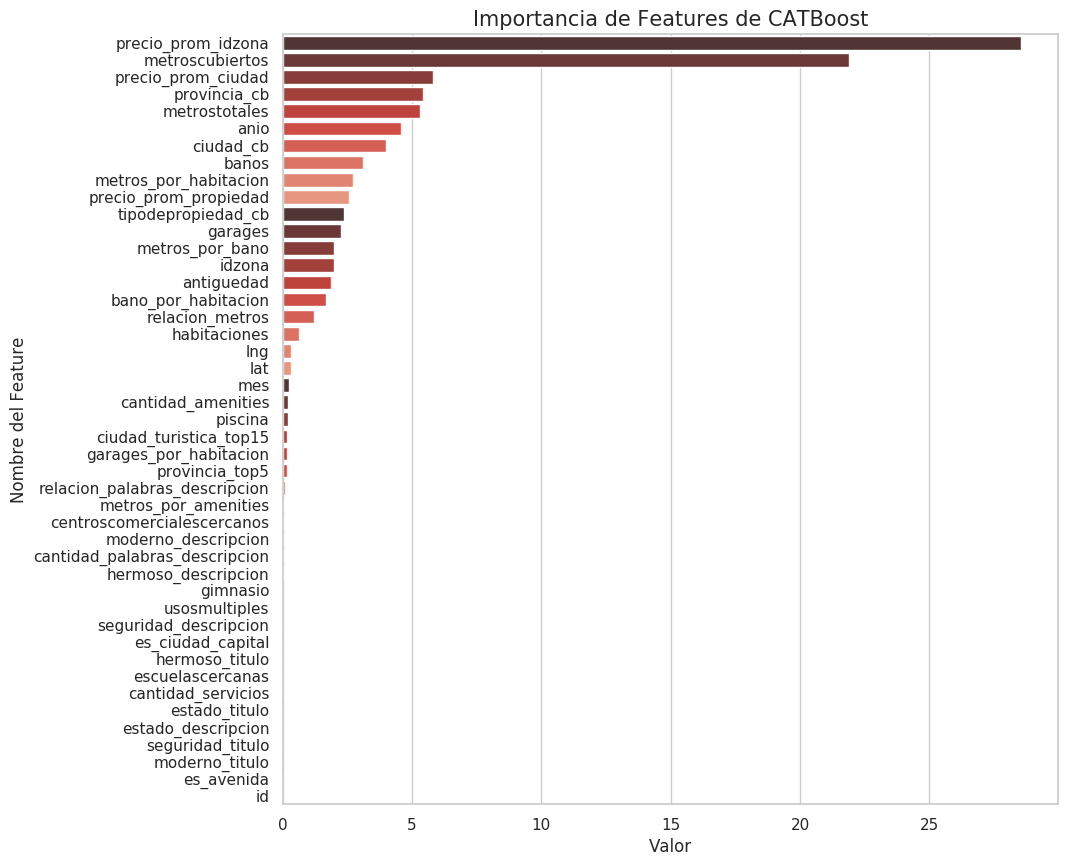

In [84]:
features = pd.DataFrame(index=feature_cols)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [85]:
k=40

features_to_drop = features.nsmallest((df_train.columns.size - k), 'imp').index.tolist()
if 'id' in features_to_drop: features_to_drop.remove('id')
features_to_drop

['seguridad_titulo',
 'moderno_titulo',
 'es_avenida',
 'estado_descripcion',
 'estado_titulo']

In [86]:
#Dropeamos los features menos importantes
df_train = df_train.drop(features_to_drop, axis=1)
df_test = df_test.drop(features_to_drop, axis=1)

### Guardo Features generados

In [87]:
df_train.to_csv('../data/train_con_features_encoded.csv')
df_test.to_csv('../data/test_con_features_encoded.csv')